In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../temp_data/merged_df.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import xgboost

In [4]:
df1 = df[['LotArea','LotFrontage']].copy()
df1.head()

,LotArea,LotFrontage
0,8450,65.0
1,9600,80.0
2,11250,68.0
3,9550,60.0
4,14260,84.0


In [5]:
df1.shape

(2919, 2)

In [6]:
df1 = df1.dropna()

In [7]:
df1.shape

(2433, 2)

### Scaling Data

In [8]:
df1.LotArea.describe()

count      2433.000000
mean       9726.232635
std        6425.779956
min        1300.000000
25%        7250.000000
50%        9260.000000
75%       11216.000000
max      215245.000000
Name: LotArea, dtype: float64

In [9]:
df1.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
# scaler = MinMaxScaler()
# df1.LotArea = scaler.fit_transform(df1[['LotArea']])
# df1.LotFrontage = scaler.fit_transform(df1[['LotFrontage']])

Text(0, 0.5, 'LotFrontage')

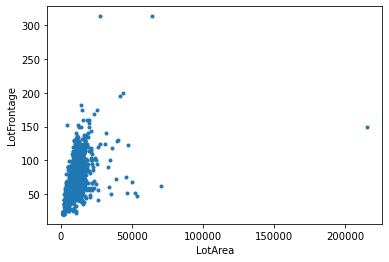

In [11]:
plt.scatter(df1.LotArea, df1.LotFrontage, marker='.')
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')

In [20]:
df2 = df1[(df1.LotArea<25000) & (df1.LotFrontage<150)]

Text(0, 0.5, 'LotFrontage')

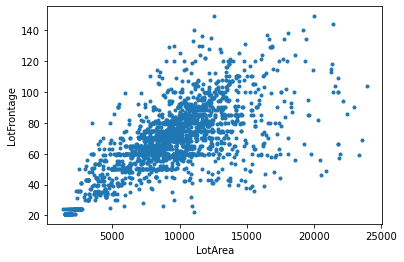

In [21]:
plt.scatter(df2.LotArea, df2.LotFrontage, marker='.')
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')

In [22]:
df2.shape

(2393, 2)

In [23]:
X = df2.LotArea
y = df2.LotFrontage

In [24]:
X = np.array(X)
X.shape+=(1,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.42743462130083165

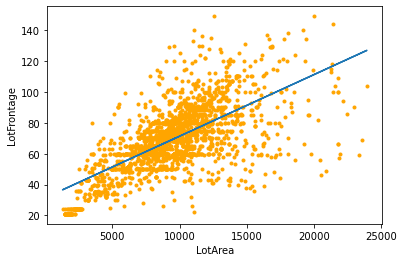

In [27]:
pred_lr = lr.predict(X)
plt.scatter(X, y, marker='.', color='orange')
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')
plt.plot(X, pred_lr)

In [28]:
xgb = xgboost.XGBRegressor(learning_rate=0.05, subsample=0.6)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.5405426618008643

In [29]:
pred_xgb = xgb.predict(X)

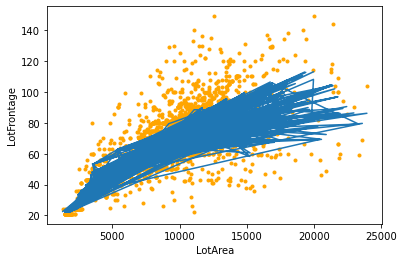

In [30]:
plt.scatter(X, y, marker='.', color='orange')
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')
plt.plot(X, pred_xgb)

In [31]:
import pickle

In [32]:
with open('../temp_models/LotFrontage_model_xgb.pkl','wb') as f:
    pickle.dump(xgb,f)